In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
import seaborn as sns
import os
import missingno as msno
import pickle
from glob import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
order_files = glob(f'{os.path.abspath("1. 이커머스 FC주문 데이터")}/1-*')
delivery_files = glob(f'{os.path.abspath("2. 택배 배송 데이터")}/2-*.xlsx')

In [3]:
order_raw = []
for file in tqdm(order_files):
    try:
        order = pd.read_excel(file, sheet_name=0)
        order_raw.append(order)
    except:
        order = pd.read_csv(file)
        order_raw.append(order)
orders = pd.concat(order_raw)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [33:02<00:00, 495.63s/it]


In [4]:
delivery_raw = []
for file in tqdm(delivery_files):
    delivery = pd.read_excel(file, index_col=0)
    delivery_raw.append(delivery)
deliveries = pd.concat(delivery_raw)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [18:22<00:00, 78.77s/it]


In [5]:
orders.to_csv('orders.csv', index=False)
deliveries.to_csv('deliveries.csv', index=False)

## Preprocessing

In [29]:
orders.BKG_DATE = pd.to_datetime(orders.BKG_DATE, format='%Y%m%d')
orders.INS_DATE = pd.to_datetime(orders.INS_DATE, format='%Y%m%d')
orders["BKG_TIME"] = pd.to_datetime(orders["BKG_TIME"].apply(lambda x : str(x).zfill(6)), format='%H%M%S')

In [30]:
# 주문 날짜 분류
orders['BKG_MONTH'] = orders.BKG_DATE.dt.month
orders['BKG_DAY'] = orders.BKG_DATE.dt.day
orders['BKG_DAYNAME'] = orders.BKG_DATE.dt.day_name()

orders['BKG_HOUR'] = orders['BKG_TIME'].dt.hour

In [304]:
orders['BKG_HOUR'] = orders['BKG_TIME'].dt.hour

In [31]:
# 송화인 주소 전처리
orders.loc[orders.SHPR_ADDR_1=='서울시','SHPR_ADDR_1'] = '서울특별시'
orders.loc[orders.SHPR_ADDR_1=='경기','SHPR_ADDR_1'] = '경기도'

In [32]:
# 수화인 주소 전처리
orders.loc[orders.CNEE_ADDR_1=='전남목포시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['전라남도','목포시']
orders.loc[orders.CNEE_ADDR_1=='경기도수원시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도','수원시']
orders.loc[orders.CNEE_ADDR_1=='경기도시흥시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도','시흥시']
orders.loc[orders.CNEE_ADDR_1=='충남금산군',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['충청남도','금산군']
orders.loc[orders.CNEE_ADDR_1=='인천광역시미추홀구',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['인천광역시','미추홀구']
orders.loc[orders.CNEE_ADDR_1=='청주시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['충청북도','청주시']
orders.loc[orders.CNEE_ADDR_1=='경기도수원시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도','수원시']
orders.loc[orders.CNEE_ADDR_1=='경기도시흥시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도','시흥시']
orders.loc[orders.CNEE_ADDR_1=='충남금산군',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['충청남도','금산군']
orders.loc[orders.CNEE_ADDR_1=='인천광역시미추홀구',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['인천광역시','미추홀구']
orders.loc[orders.CNEE_ADDR_1=='영천시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경상북도','영천시']
orders.loc[orders.CNEE_ADDR_1=='청주시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['충청북도','청주시']
orders.loc[orders.CNEE_ADDR_1=='태종로711번길',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경상북도','경주시']
orders.loc[orders.CNEE_ADDR_1=='道路名稱首爾特別市中區麻將路1街22號（STUDIO',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['서울특별시','중구']
orders.loc[orders.CNEE_ADDR_1=='강서구',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['서울특별시', '강서구']
orders.loc[orders.CNEE_ADDR_1=='마포구',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['서울특별시','마포구']
orders.loc[orders.CNEE_ADDR_1=='영등포구',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['서울특별시','영등포구']

orders.loc[orders.CNEE_ADDR_1=='울특별시','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='강원','CNEE_ADDR_1'] = '강원도'
orders.loc[orders.CNEE_ADDR_1=='서울','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='경북','CNEE_ADDR_1'] = '경상북도'
orders.loc[orders.CNEE_ADDR_1=='대전','CNEE_ADDR_1'] = '대전광역시'
orders.loc[orders.CNEE_ADDR_1=='광주','CNEE_ADDR_1'] = '광주광역시'
orders.loc[orders.CNEE_ADDR_1=='전북','CNEE_ADDR_1'] = '전라북도'
orders.loc[orders.CNEE_ADDR_1=='경남','CNEE_ADDR_1'] = '경상남도'
orders.loc[orders.CNEE_ADDR_1=='대구','CNEE_ADDR_1'] = '대구광역시'
orders.loc[orders.CNEE_ADDR_1=='세종','CNEE_ADDR_1'] = '세종특별자치시'
orders.loc[orders.CNEE_ADDR_1=='\u200b서울시','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='대구시','CNEE_ADDR_1'] = '대구광역시'
orders.loc[orders.CNEE_ADDR_1=='\t경기도','CNEE_ADDR_1'] = '경기도'
orders.loc[orders.CNEE_ADDR_1=='경기','CNEE_ADDR_1'] = '경기도'
orders.loc[orders.CNEE_ADDR_1=='인천','CNEE_ADDR_1'] = '인천광역시'
orders.loc[orders.CNEE_ADDR_1=='전남','CNEE_ADDR_1'] = '전라남도'
orders.loc[orders.CNEE_ADDR_1=='부산','CNEE_ADDR_1'] = '부산광역시'
orders.loc[orders.CNEE_ADDR_1=='충남','CNEE_ADDR_1'] = '충청남도'
orders.loc[orders.CNEE_ADDR_1=='충북','CNEE_ADDR_1'] = '충청북도'
orders.loc[orders.CNEE_ADDR_1=='울산','CNEE_ADDR_1'] = '울산광역시'
orders.loc[orders.CNEE_ADDR_1=='부산시','CNEE_ADDR_1'] = '부산광역시'
orders.loc[orders.CNEE_ADDR_1=='인천시','CNEE_ADDR_1'] = '인천광역시'
orders.loc[orders.CNEE_ADDR_1=='서울시','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='제주','CNEE_ADDR_1'] = '제주특별자치도'
orders.loc[orders.CNEE_ADDR_1=='세종시','CNEE_ADDR_1'] = '세종특별자치시'
orders.loc[orders.CNEE_ADDR_1=='화성시','CNEE_ADDR_1'] = '경기도'
orders.loc[orders.CNEE_ADDR_1=='전남','CNEE_ADDR_1'] = '전라남도'
orders.loc[orders.CNEE_ADDR_1=='울특별시','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='강원','CNEE_ADDR_1'] = '강원도'
orders.loc[orders.CNEE_ADDR_1=='서울','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='경북','CNEE_ADDR_1'] = '경상북도'
orders.loc[orders.CNEE_ADDR_1=='대전','CNEE_ADDR_1'] = '대전광역시'
orders.loc[orders.CNEE_ADDR_1=='광주','CNEE_ADDR_1'] = '광주광역시'
orders.loc[orders.CNEE_ADDR_1=='전북','CNEE_ADDR_1'] = '전라북도'
orders.loc[orders.CNEE_ADDR_1=='경남','CNEE_ADDR_1'] = '경상남도'
orders.loc[orders.CNEE_ADDR_1=='대구','CNEE_ADDR_1'] = '대구광역시'
orders.loc[orders.CNEE_ADDR_1=='세종','CNEE_ADDR_1'] = '세종특별자치시'
orders.loc[orders.CNEE_ADDR_1=='\u200b서울시','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='대구시','CNEE_ADDR_1'] = '대구광역시'
orders.loc[orders.CNEE_ADDR_1=='\t경기도','CNEE_ADDR_1'] = '경기도'
orders.loc[orders.CNEE_ADDR_1=='경기','CNEE_ADDR_1'] = '경기도'
orders.loc[orders.CNEE_ADDR_1=='인천','CNEE_ADDR_1'] = '인천광역시'
orders.loc[orders.CNEE_ADDR_1=='전남','CNEE_ADDR_1'] = '전라남도'
orders.loc[orders.CNEE_ADDR_1=='부산','CNEE_ADDR_1'] = '부산광역시'
orders.loc[orders.CNEE_ADDR_1=='충남','CNEE_ADDR_1'] = '충청남도'
orders.loc[orders.CNEE_ADDR_1=='충북','CNEE_ADDR_1'] = '충청북도'
orders.loc[orders.CNEE_ADDR_1=='울산','CNEE_ADDR_1'] = '울산광역시'
orders.loc[orders.CNEE_ADDR_1=='부산시','CNEE_ADDR_1'] = '부산광역시'
orders.loc[orders.CNEE_ADDR_1=='인천시','CNEE_ADDR_1'] = '인천광역시'
orders.loc[orders.CNEE_ADDR_1=='서울시','CNEE_ADDR_1'] = '서울특별시'
orders.loc[orders.CNEE_ADDR_1=='제주','CNEE_ADDR_1'] = '제주특별자치도'
orders.loc[orders.CNEE_ADDR_1=='세종시','CNEE_ADDR_1'] = '세종특별자치시'
orders.loc[orders.CNEE_ADDR_1=='화성시','CNEE_ADDR_1'] = '경기도'
orders.loc[orders.CNEE_ADDR_1=='전남','CNEE_ADDR_1'] = '전라남도'
orders.loc[orders.CNEE_ADDR_1=='경삼남도','CNEE_ADDR_1'] = '경상남도'
orders.loc[orders.CNEE_ADDR_1=='종시','CNEE_ADDR_1'] = '세종특별자치시'
orders.loc[orders.CNEE_ADDR_1=='청남도','CNEE_ADDR_1'] = '충청남도'

orders.loc[orders.CNEE_ADDR_1=='[16817]',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도', '용인시']
orders.loc[orders.CNEE_ADDR_1=='(14782)',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도', '부천시']
orders.loc[orders.CNEE_ADDR_1=='(30100)',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['세종특별자치시', '세종로']
orders.loc[orders.CNEE_ADDR_1=='(22738)',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['인천광역시', '서구']
orders.loc[orders.CNEE_ADDR_1=='(53298)',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경상남도', '거제시']
orders.loc[orders.CNEE_ADDR_1=='(13279)',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도', '성남시']
orders.loc[orders.CNEE_ADDR_1=='(13499)',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도', '성남시']
orders.loc[orders.CNEE_ADDR_1=='(12730)', ['CNEE_ADDR_1','CNEE_ADDR_2']] = ['인천광역시','서구']
orders.loc[orders.CNEE_ADDR_1=='인천광역시\xa0서구\xa0정서진로\xa047',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['인천광역시','서구']
orders.loc[orders.CNEE_ADDR_1=='평택시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도','평택시']
orders.loc[orders.CNEE_ADDR_1=='곤지암',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경기도','광주시']
orders.loc[orders.CNEE_ADDR_1=='상주시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경상북도','상주시']

orders.loc[orders.CNEE_ADDR_2=='충남공주시',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['충청남도','공주시']
orders.loc[orders.CNEE_ADDR_2=='경상남도',['CNEE_ADDR_1','CNEE_ADDR_2']] = ['경상남도',np.nan]

In [80]:
orders.to_csv('orders.csv', index=False)

In [ ]:
orders = pd.read_csv('orders.csv')
deliveries = pd.read_csv('deliveries.csv')

In [ ]:
orders.BKG_DATE = pd.to_datetime(orders.BKG_DATE, format='%Y-%m-%d')
orders.INS_DATE = pd.to_datetime(orders.INS_DATE, format='%Y-%m-%d')

## EDA

### Orders

#### column 설명
- CORP_ID: 창고코드(KX007: 곤지암, GP001: 군포)
- REF_ORD_NO: 고객 주문번호, 해당 테이블 key값, 네이버 채번
- BKG_NO: CJ대한통운 주문번호
- BKG_TYP: 주문유형(7: B2C출고, 8: 정상반출, 9: 불량반출) 
- BKG_DATE: 주문날짜
- BKG_TIME: 주문시간
- SHPR_CD: 고객사 코드
- INV_AMT: 주문금액
- ITEM_SEQ: 품목순번
- ITEM_CD: 품목코드
- BRAND_NM: 브랜드
- ITEM_QTY: 품목수량
- ITEM_AMT: 품목금액
- IF_YN: 수신여부
- ORDER_CRT_DATETIME: 주문생성시간
- DLV_DV: 택배구분
- REF_ITEM_SEQ: 상품주문번호
- ORDER_IDX: 중개업체 주문번호
- ORDER_YN: 접수여부
- DLVPREARRBRANCD: 배달예정점소코드
- DLVPREARREMPNICKNM: 배달예정사원분류코드
- DLVCLSFCD: 배달터미널코드
- DLVSUBCLSFCD: 배달터미널 소분류코드
- INS_ID: 입력자ID
- INS_DATE: 입력일자(인터페이스시간)
- INS_TIME: 입력시간(인터페이스시간)
- POST_ZONE: 권역구분
- SPLIT_EXEC_YN: 배송처별 주문분할여부
- SHPR_ADDR_1: 송화인 주소1(시도)
- SHPR_ADDR_2: 송화인 주소2(시군구)
- CNEE_ADDR_1: 수화인 주소1(시도)
- CNEE_ADDR_2: 수화인 주소2(시군구)

In [134]:
orders.head()

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,BKG_MONTH,BKG_DAY,BKG_DAYNAME,BKG_HOUR
0,KX007,2021030365922551,KX007210303370934,7,2021-03-03,1900-01-01 03:55:10,90001302,22400.0,2,134265392,...,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,3,3,Wednesday,3
1,KX007,2021030365922951,KX007210303371080,7,2021-03-03,1900-01-01 03:55:21,90001441,20900.0,1,4610261043_2,...,50.0,N,경기도,광주시,경상남도,김해시,3,3,Wednesday,3
2,KX007,2021030365924361,KX007210303371081,7,2021-03-03,1900-01-01 03:55:13,90001441,37900.0,1,4936599538_1,...,53.0,N,경기도,광주시,경상남도,거제시,3,3,Wednesday,3
3,KX007,2021030365928921,KX007210303371205,7,2021-03-03,1900-01-01 03:56:08,90001542,69800.0,1,3858391637_1,...,6.0,N,경기도,광주시,서울특별시,서초구,3,3,Wednesday,3
4,KX007,2021030365930451,KX007210303370967,7,2021-03-03,1900-01-01 03:55:51,90001341,73700.0,1,4631307460,...,10.0,N,경기도,광주시,경기도,김포시,3,3,Wednesday,3


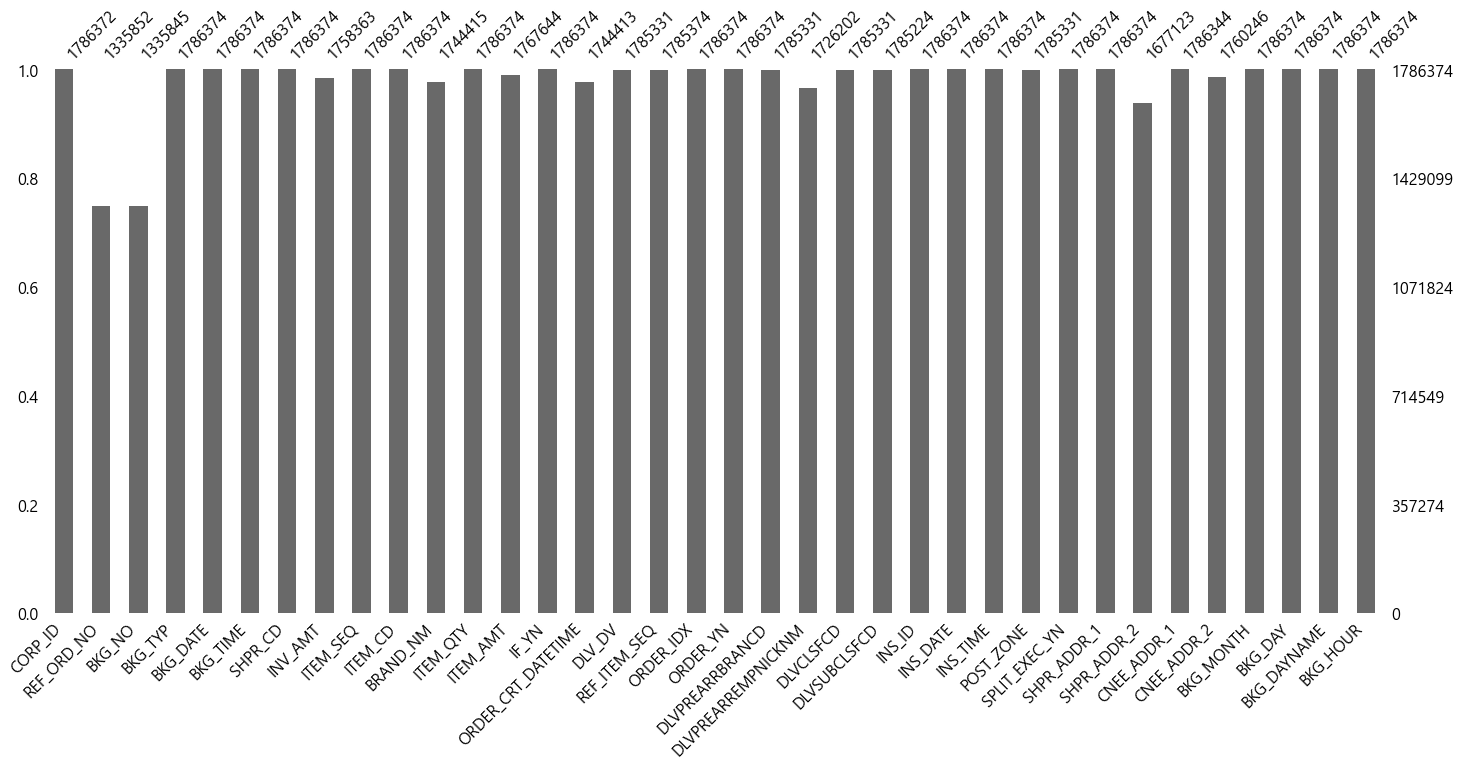

In [135]:
msno.bar(orders)
plt.show()

In [9]:
# 창고코드
orders.CORP_ID.value_counts()

KX007    1606010
GP001     180364
Name: CORP_ID, dtype: int64

In [10]:
# 주문유형
orders.BKG_TYP.value_counts()

7    1785327
8       1047
Name: BKG_TYP, dtype: int64

In [11]:
# 고객사 번호
print(f'nunique: {orders.SHPR_CD.nunique()}')
print(orders.SHPR_CD.value_counts())

nunique: 29
90001302    464991
90001542    205013
90001341    168297
90001541    148705
90001441    126855
90001602    110317
90001443    100764
90001582     82210
90001622     68840
90001521     59042
90001703     57220
90001682     36238
90001702     30948
90001705     24686
90001776     24418
90001704     21182
90001502     14024
90001768     12867
90001662      8260
90001765      6271
90001683      5876
90001381      5469
90001664      1941
90001562      1109
90001774       751
90001842        49
90001772        20
90001802         6
90001762         5
Name: SHPR_CD, dtype: int64


In [13]:
# 품목순번
orders.ITEM_SEQ.nunique()

116

In [14]:
# 품목코드
orders.ITEM_CD.nunique()

16951

In [15]:
# 브랜드명
orders.BRAND_NM.value_counts()

조합형옵션상품    1349758
단일상품        387783
추가구성상품        6874
Name: BRAND_NM, dtype: int64

In [16]:
# 수신여부
orders.IF_YN.value_counts()

N    1786374
Name: IF_YN, dtype: int64

In [17]:
# 택배 구분
orders.DLV_DV.value_counts()

1.0    1785331
Name: DLV_DV, dtype: int64

In [18]:
# 접수여부
orders.ORDER_YN.value_counts()

Y    1786374
Name: ORDER_YN, dtype: int64

In [19]:
# 배달예정점소코드
orders.DLVPREARRBRANCD.nunique()

2074

In [20]:
# 배달예정사원분류코드
orders.DLVPREARREMPNICKNM.nunique()

2430

In [21]:
# 배달터미널코드
orders.DLVCLSFCD.nunique()

349

In [22]:
# 배달터미널소분류코드
orders.DLVSUBCLSFCD.nunique()

119

In [23]:
orders.DLVSUBCLSFCD.value_counts()

1     433787
2     365820
0     276883
3     121861
4      75339
       ...  
1r        10
1o         8
1n         7
1q         6
1s         5
Name: DLVSUBCLSFCD, Length: 119, dtype: int64

In [24]:
# 입력자 ID
print(f'nunique: {orders.INS_ID.nunique()}')
orders.INS_ID.value_counts()

nunique: 55


iNEXBatch       1744385
BATCH             14054
sibizi53           8760
sibizi47           2333
13406634_WEB       2142
sibizi22           1945
LION03             1876
sibizi56           1682
sibizi28           1634
MIMI01             1109
NESTLE09           1048
AK04                992
nutrione06          990
daesang01           919
YUHAN16             823
sibizi27            572
sibizi49            189
NESTLE11            123
GNM01                90
CHANSOL01            89
GNM02                73
yangji03             72
LION02               49
hamsoa02             47
LION05               45
frombio01            38
life03               37
vanada01             36
YUHAN17              30
gcbio03              26
bebesup09            21
osulloc01            20
daechungim01         19
nutrione01           14
NESTLE04              9
AK05                  8
LION08                8
ckdhc04               8
nutrione03            7
JKI04                 7
pigeon07              6
YUHAN08         

In [25]:
# 권역구분
orders.POST_ZONE.nunique()

60

In [26]:
orders.POST_ZONE.value_counts()

16.0    76506
10.0    76037
12.0    62731
14.0    60307
6.0     56291
7.0     55761
18.0    53855
5.0     53324
17.0    52719
31.0    50642
21.0    50416
8.0     49272
4.0     47159
13.0    46709
42.0    43527
22.0    41866
3.0     40628
2.0     39735
51.0    39139
1.0     35899
15.0    35848
11.0    35365
44.0    33665
50.0    33265
48.0    31818
46.0    31751
28.0    31398
34.0    30903
41.0    30499
47.0    30434
54.0    30044
61.0    29077
52.0    23625
37.0    22318
58.0    21731
39.0    21281
27.0    19489
38.0    19256
26.0    18117
24.0    17673
62.0    17631
35.0    17484
57.0    16475
25.0    16204
30.0    16011
32.0    15516
59.0    15085
36.0    14974
55.0    14829
53.0    14476
49.0    14183
63.0    10995
33.0     5777
56.0     5060
99.0     2608
43.0     2198
29.0     1947
23.0     1714
40.0     1422
45.0      662
Name: POST_ZONE, dtype: int64

In [27]:
# 배송처별 주문분할여부
orders.SPLIT_EXEC_YN.value_counts()

N    1786358
Y         16
Name: SPLIT_EXEC_YN, dtype: int64

In [33]:
orders.SHPR_ADDR_1.value_counts()

경기도        1706030
세종특별자치시      43563
충청남도         18764
서울특별시        14581
인천광역시         3360
충청북도            52
대전광역시           18
경상북도             6
Name: SHPR_ADDR_1, dtype: int64

In [34]:
orders.SHPR_ADDR_2.value_counts()

광주시    1475675
안산시      82117
용인시      43442
안성시      35942
금천구      14581
천안시      12861
보령시       5855
고양시       5433
군포시        722
포천시        385
청주시         51
당진시         48
평택시          8
이천시          2
충주시          1
Name: SHPR_ADDR_2, dtype: int64

In [72]:
orders.CNEE_ADDR_1.value_counts()

경기도                 501363
서울특별시               378672
경상남도                110723
부산광역시               108283
인천광역시                94106
경상북도                 79420
대구광역시                76265
충청남도                 72115
전라남도                 53562
충청북도                 52962
강원도                  52153
전라북도                 50038
대전광역시                48450
광주광역시                46779
울산광역시                34357
세종특별자치시              16062
제주특별자치도              11025
인천광역시 서구 정서진로 47         7
중구                       2
Name: CNEE_ADDR_1, dtype: int64

In [73]:
orders.CNEE_ADDR_2.value_counts()

서구       50522
수원시      43588
용인시      42810
북구       41851
화성시      39764
         ...  
고운북4길        1
대평4길         1
반곡5길         1
바른8길         1
고운서3길        1
Name: CNEE_ADDR_2, Length: 337, dtype: int64

### Delivery

#### column 설명
- 구분명: 배달/집하
- 집화일자: 집화(화물이나 상품 따위가 한곳에 모여들거나 모이게 함)
- 집배일자: 집배(우편물이나 화물 따위를 모아서 주소지로 배달하는 따위를 이른다.)
- 운임명: 선불/신용/착불
- 수량: box
- 운임: 원
- 집화여부: 여부(Y/N)
- 집배시간: 
- 배달일자: 배달/집하 완료 일자
- 장비구분: 화면/스마트폰
- 품목: 배송상품 품목 분류
- SM명: 택배기사 성명
- 받는분 주소

In [ ]:
msno.bar(deliveries)
plt.show()

In [ ]:
deliveries.isna().sum()[deliveries.isna().sum()!=0]

In [ ]:
deliveries.head()

In [ ]:
deliveries.구분명.value_counts()

In [ ]:
deliveries.운임명.value_counts()

In [ ]:
deliveries.집화여부.value_counts()

In [ ]:
deliveries.장비구분.value_counts()

In [ ]:
deliveries.품목.value_counts()

In [ ]:
deliveries.SM명.nunique()